In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


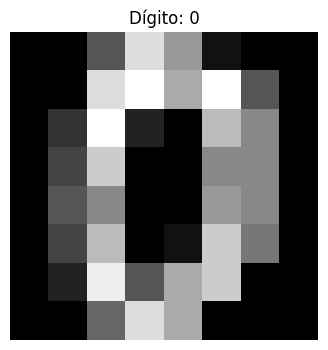

In [5]:
index = 0

plt.figure(figsize=(4, 4))
plt.imshow(digits.images[index], cmap='gray')
plt.title(f'Dígito: {digits.target[index]}')
plt.axis('off')
plt.show()

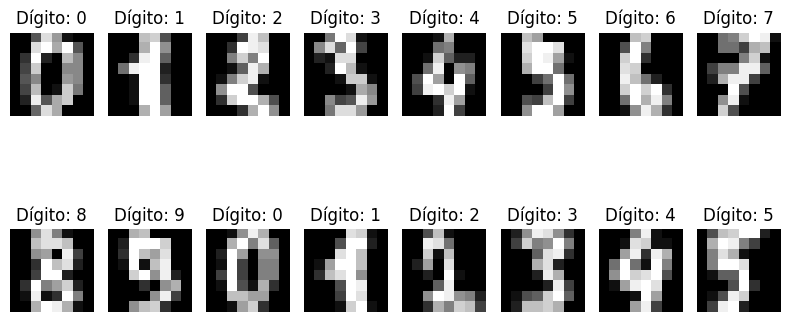

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar el dataset
digits = load_digits()

# Crear una figura para mostrar las imágenes de 0 a 7
plt.figure(figsize=(8, 8))

# Iterar sobre los ejemplos de 0 a 7
for i in range(16):
    # Crear un subplot para cada imagen
    plt.subplot(4, 8, i + 1)

    # Mostrar la imagen correspondiente (reshape de 8x8)
    plt.imshow(digits.images[i], cmap='gray')

    # Mostrar la etiqueta del dígito
    plt.title(f'Dígito: {digits.target[i]}')

    # Ocultar los ejes
    plt.axis('off')

# Ajustar el layout y mostrar las imágenes
plt.tight_layout()
plt.show()



In [7]:
pixel_stats = df.describe()
print(pixel_stats)

           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     

In [8]:
df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

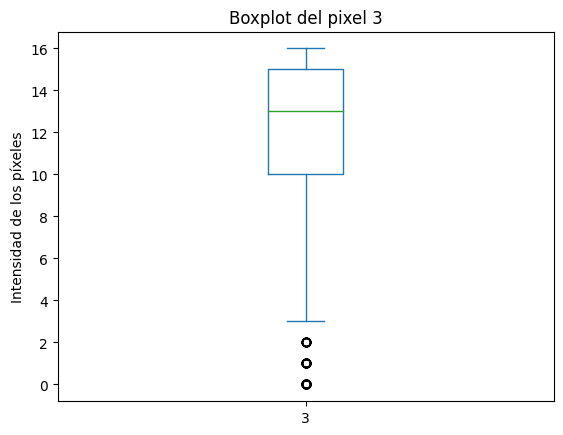

In [9]:
df[3].plot(kind='box')
plt.title("Boxplot del pixel 3")
plt.ylabel("Intensidad de los píxeles")
plt.show()

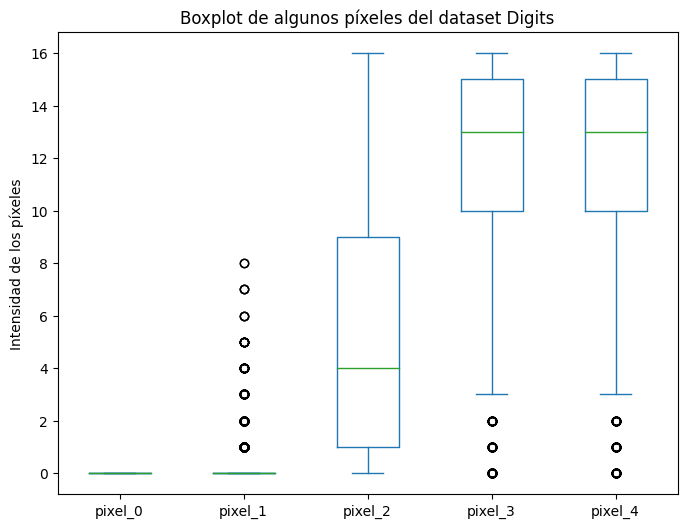

In [10]:
digits = load_digits()

# Convertir a DataFrame
df_digits = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])

# Seleccionar algunas columnas (por ejemplo, los primeros 5 píxeles) para hacer el boxplot
df_digits[['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4']].plot(kind='box', figsize=(8, 6))

# Mostrar el gráfico
plt.title("Boxplot de algunos píxeles del dataset Digits")
plt.ylabel("Intensidad de los píxeles")
plt.show()


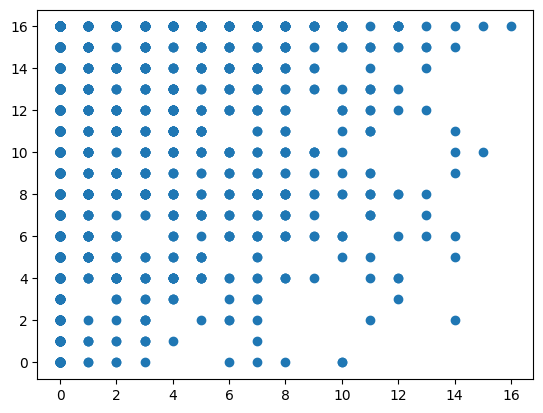

In [11]:
plt.scatter(df[9], df[12])
plt.show()


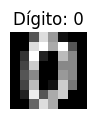

El clúster predicho para el dígito 8 (imagen 1) es: 2


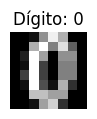

El clúster predicho para el dígito 8 (imagen 2) es: 2


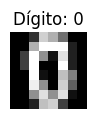

El clúster predicho para el dígito 8 (imagen 3) es: 2


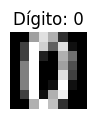

El clúster predicho para el dígito 8 (imagen 4) es: 2


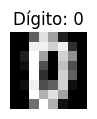

El clúster predicho para el dígito 8 (imagen 5) es: 2


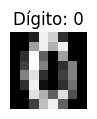

El clúster predicho para el dígito 8 (imagen 6) es: 2


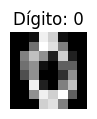

El clúster predicho para el dígito 8 (imagen 7) es: 2


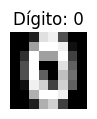

El clúster predicho para el dígito 8 (imagen 8) es: 2


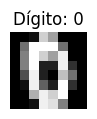

El clúster predicho para el dígito 8 (imagen 9) es: 2


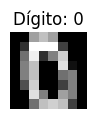

El clúster predicho para el dígito 8 (imagen 10) es: 2


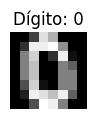

El clúster predicho para el dígito 8 (imagen 11) es: 2


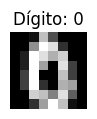

El clúster predicho para el dígito 8 (imagen 12) es: 2


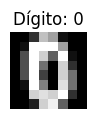

El clúster predicho para el dígito 8 (imagen 13) es: 2


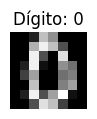

El clúster predicho para el dígito 8 (imagen 14) es: 2


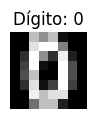

El clúster predicho para el dígito 8 (imagen 15) es: 2


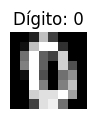

El clúster predicho para el dígito 8 (imagen 16) es: 2


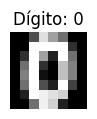

El clúster predicho para el dígito 8 (imagen 17) es: 2


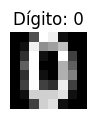

El clúster predicho para el dígito 8 (imagen 18) es: 2


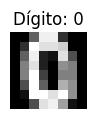

El clúster predicho para el dígito 8 (imagen 19) es: 2


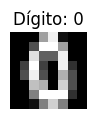

El clúster predicho para el dígito 8 (imagen 20) es: 2


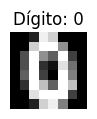

El clúster predicho para el dígito 8 (imagen 21) es: 2


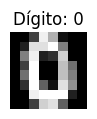

El clúster predicho para el dígito 8 (imagen 22) es: 2


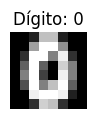

El clúster predicho para el dígito 8 (imagen 23) es: 2


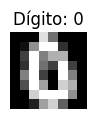

El clúster predicho para el dígito 8 (imagen 24) es: 2


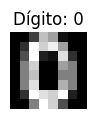

El clúster predicho para el dígito 8 (imagen 25) es: 2


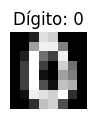

El clúster predicho para el dígito 8 (imagen 26) es: 2


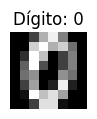

El clúster predicho para el dígito 8 (imagen 27) es: 2


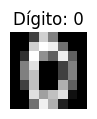

El clúster predicho para el dígito 8 (imagen 28) es: 2


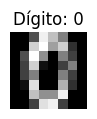

El clúster predicho para el dígito 8 (imagen 29) es: 2


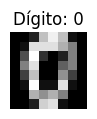

El clúster predicho para el dígito 8 (imagen 30) es: 2


In [32]:
k = 10
km = KMeans(n_clusters=k, n_init="auto")

pixelPredicted = km.fit_predict(df)

digit_8_indices = [i for i, label in enumerate(digits.target) if label == 0]

for i in range(30):
    index = digit_8_indices[i]

    plt.figure(figsize=(1, 1))
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f'Dígito: {digits.target[index]}')
    plt.axis('off')
    plt.show()

    rowSelected = df.iloc[index, :].values.reshape(1, -1)

    predicted_cluster = km.predict(rowSelected)
    print(f'El clúster predicho para el dígito 8 (imagen {i+1}) es: {predicted_cluster[0]}')

### Filas

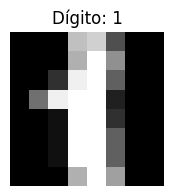

8


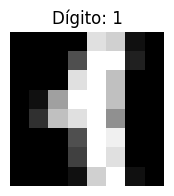

1


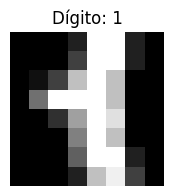

1


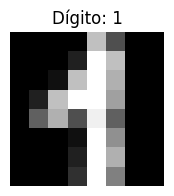

1


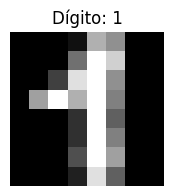

1


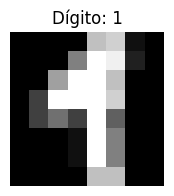

1


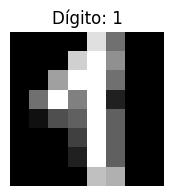

1


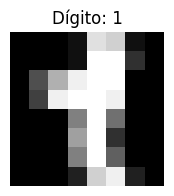

1


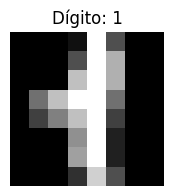

8


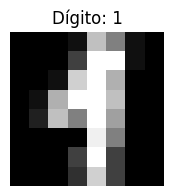

1


In [21]:
x = df.iloc[:, 40:48].values

k = 10
km = KMeans(n_clusters=k, n_init="auto")

rowPredicted = km.fit_predict(x)

indices =  [i for i, label in enumerate(digits.target) if label == 1]
for i in range(10):
    index = indices[i]

    plt.figure(figsize=(2, 2))
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f'Dígito: {digits.target[index]}')
    plt.axis('off')
    plt.show()

    rowSelected = df.iloc[index, :8].values.reshape(1, -1)
    predicted_cluster = km.predict(rowSelected)
    print(predicted_cluster[0])         #bien hasta aqui

### Columnas

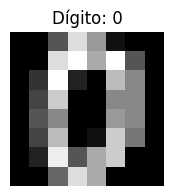

2


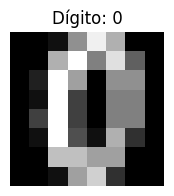

5


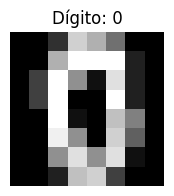

5


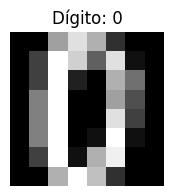

5


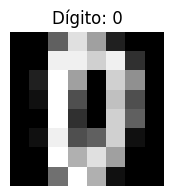

5


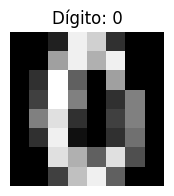

5


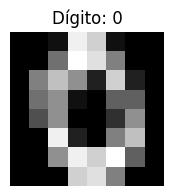

5


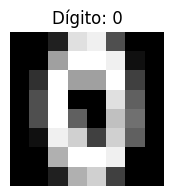

5


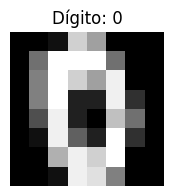

2


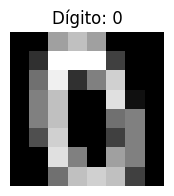

2


In [29]:
x = df.iloc[40:48, :].values.T

k = 10
km = KMeans(n_clusters=k, n_init="auto")

rowPredicted = km.fit_predict(x)

indices =  [i for i, label in enumerate(digits.target) if label == 0]
for i in range(10):
    index = indices[i]

    plt.figure(figsize=(2, 2))
    plt.imshow(digits.images[index], cmap='gray')
    plt.title(f'Dígito: {digits.target[index]}')
    plt.axis('off')
    plt.show()

    rowSelected = df.iloc[index, :8].values.reshape(1, -1)
    predicted_cluster = km.predict(rowSelected)
    print(predicted_cluster[0])

# Conclusion y reflexion

En esta actividad usamos 'digits' de sklearn, el cual es un dataset que contiene 1797 imágenes de 8x8 píxeles. El código lo utilicé primeramente para analizar gráficamente y estadísticamente el dataset, ahora convertido en dataframe. Después de esto, y de tener una visión mucho más clara de lo que es cada dígito o píxel en el dataframe, hice k-means para predecir el número que se muestra en la imagen. Los clusters evaluaron muy bien algunos dígitos, como el 1 o el 0; sin embargo, hay dígitos que no predicen muy bien, como el 3 o el 8. Aparte de que los dígitos que sí predicen o agrupan correctamente no son el mismo dígito que el de la imagen. Por ejemplo, en las imágenes que tienen 0, el cluster que predicen es el 2, pero está bien, ya que los identifica y agrupa a todos iguales. Después de esto, intenté predecir con únicamente filas o únicamente columnas. Esto dio como resultado que las columnas y filas de los lados externos son básicamente insignificantes, y el valor importante que necesita identificar k-means para dar los clusters correctos son las filas y columnas centrales.


### Referencias:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://chat.openai.com/chat